In [6]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    final_number1: int
    number3: int
    operation2: str
    number4: int
    final_number2: int

In [ ]:
# def adder(state: AgentState, iteration: Literal[1] | Literal[2]) -> AgentState:
#     '''Adds the two numbers in state'''
#     number1 = state['number1'] if iteration == 1 else state['number3']
#     number2 = state['number2'] if iteration == 2 else state['number4']
#     output_key = 'final_number1' if iteration == 1 else 'final_number2'
#     state[output_key] = number1 + number2
#     return state

# def subtractor(state: AgentState, iteration: Literal[1] | Literal[2]) -> AgentState:
#     '''Adds the two numbers in state'''
#     number1 = state['number1'] if iteration == 1 else state['number3']
#     number2 = state['number2'] if iteration == 2 else state['number4']
#     output_key = 'final_number1' if iteration == 1 else 'final_number2'
#     state[output_key] = number1 - number2
#     return state

# def decide_next_node(state: AgentState) -> str:
#     '''Selects the next node in the graph'''
#     if state['operation'] == "+":
#         return "addition_operation"
#     elif state['operation'] == "-":
#         return "subtraction_operation"
#     return "invalid"

In [11]:
def adder(state: AgentState) -> AgentState:
    '''Adds the two numbers in state'''
    state['final_number1'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    '''Subtract number 1 from number 2 in state'''
    state['final_number1'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    '''Selects the next node in the graph'''
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "subtraction_operation"
    return "invalid"

def adder2(state: AgentState) -> AgentState:
    '''Adds the two numbers in state'''
    state['final_number2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    '''Subtract number 3 from number 4 in state'''
    state['final_number2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state: AgentState) -> str:
    '''Selects the next node in the graph'''
    if state['operation2'] == "+":
        return "addition_operation"
    elif state['operation2'] == "-":
        return "subtraction_operation"
    return "invalid"

In [12]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", adder)
graph.add_node("addition_node2", adder2)
graph.add_node("subtraction_node", subtractor)
graph.add_node("subtraction_node2", subtractor2)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "addition_node",
        "subtraction_operation":"subtraction_node"
    }
)

graph.add_edge("addition_node", "router2")
graph.add_edge("subtraction_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation": "addition_node2",
        "subtraction_operation":"subtraction_node2"
    }
)
graph.add_edge("addition_node2", END)
graph.add_edge("subtraction_node2", END)

app = graph.compile()

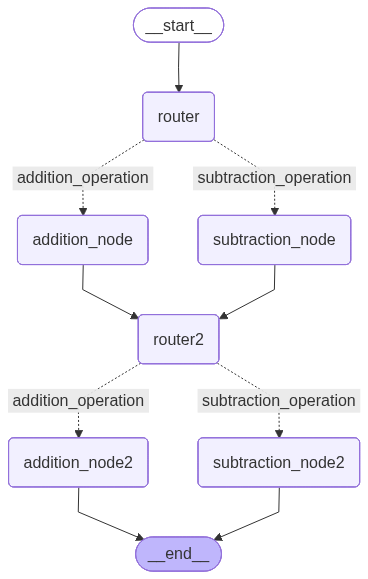

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = AgentState(
    number1 = 10,
    operation="-",
    number2 = 5,
    number3 = 7,
    number4=2,
    operation2="+",
    final_number1= 0,
    final_number2 = 0
)
app.invoke(initial_state)

{'number1': 10,
 'operation': '-',
 'number2': 5,
 'final_number1': 5,
 'number3': 7,
 'operation2': '+',
 'number4': 2,
 'final_number2': 9}